In [30]:
import numpy as np 
import matplotlib.pyplot as plt

SNR_dB = "SimulationData/10"

txMsg = np.loadtxt(str(SNR_dB)+'_txMsg.csv')

txSignalRaw = np.loadtxt(str(SNR_dB)+'_txSignalRaw.csv')
rxSignalRaw = np.loadtxt(str(SNR_dB)+'_rxSignalRaw.csv')
rxMsgRawDemod = np.loadtxt(str(SNR_dB)+'_rxMsgRawDemod.csv')

txMsgConvEnc = np.loadtxt(str(SNR_dB)+'_txMsgConvEnc.csv')
txSignalConv = np.loadtxt(str(SNR_dB)+'_txSignalConv.csv')
rxSignalConv = np.loadtxt(str(SNR_dB)+'_rxSignalConv.csv')
rxMsgConvDemod = np.loadtxt(str(SNR_dB)+'_rxMsgConvDemod.csv')
rxMsgConvHard = np.loadtxt(str(SNR_dB)+'_rxMsgConvHard.csv')
rxMsgConvSoft = np.loadtxt(str(SNR_dB)+'_rxMsgConvSoft.csv')

txMsgHammEnc = np.loadtxt(str(SNR_dB)+'_txMsgHammEnc.csv')
txSignalHamm = np.loadtxt(str(SNR_dB)+'_txSignalHamm.csv')
rxSignalHamm = np.loadtxt(str(SNR_dB)+'_rxSignalHamm.csv')
rxMsgHammDemod = np.loadtxt(str(SNR_dB)+'_rxMsgHammDemod.csv')
rxMsgHamm = np.loadtxt(str(SNR_dB)+'_rxMsgHamm.csv')


# Study of the BER after channel coding

This excercise studies the use, advantages, and properties of channel coding. 

The aim of the channel coding in to make the communication more resilient to errors / noise by adding $n-k$ (well chosen) bits to the initial $k$ data bits. Hence, $n$ bits are transmitted over the communication channel. A channel coding scheme is therefore characterized by its coding rate $$r=\frac{k}{n} \le 1.$$

Four different configurations are simulated for you

1. A raw communication without channel coding
2. A Hamming coding (15,11) which is able to correct 1 bit error within blocks of 15 bits
3. A convolution channel coding that uses hard decision (corrects the errros at bit level)
4. The same convolution channel coding as in (3) but no with soft decision (taking the level of the received signal into account)

More theory and practice in channel coding can be found in the course on "Voice, Image, Coding, Media and Systems".

<img src="BER-SNR-plot.bmp" />

Remark related to the BER curve: The curve is intentionally expressed in SNR instead of $E_b/N_0$ as done in the notes. There is a difference of 3dB between the PAM-2 curves for real valued signals (here) and complex valued signals (in the notes). This can be explained by the factor 2 that pops-up we considering the bandwidth $B$ and the fact that the noise power is given by the product of the noise power density $N_0$ and this bandwidth. 



## Raw communication without channel coding

A raw communication using an additive Gaussian noise channel over a (real-valued) PAM-2 modulation (amplitude modulation with 1 levels), where a zeros is represented by $-1$, while a one is represented using a $+1$. The gain of the channel is assumed to be equals to one. Hence, $\sigma^2_{tx} = \sigma^2_{rx} = \sigma^2_{signal} = 1$. The variance of the additive Gaussian noise $\sigma^2_n$ is such that the given $SNR$ expressed in dB equals $$SNR_{dB} = 10 \log_{10} {\left( \frac{\sigma^2_{signal}}{\sigma^2_n} \right)}.$$

The sequence of the signals are the following

* txMsg: The binary signals that is transmitted
* txSignalRaw: The binary signal "txMsg" converted in a PAM-2 format with levels -1 and 1
* rxSignalRaw: The received signal after adding zeros-mean Gaussian noise to "txSignalRaw". It is assumed to that the gain of the channel equals one.
* rxMsgRawDemod: The demodulated binary signal by considering the sign of the received signal rxSignalRaw


## Assignment communication without channel coding at a SNR of 12dB

1. Compute the signal and the noise power of the transmitted and received signal.
2. Compute the Signal-to-Noise Ratio (SNR) of the received signal
3. Plot the histogram of the received signal (to get an idea of its pdf)
4. Determine the BER for the uncoded communication. 


In [31]:
SNR_dB = "SimulationData/12"

txMsg = np.loadtxt(str(SNR_dB)+'_txMsg.csv')

txSignalRaw = np.loadtxt(str(SNR_dB)+'_txSignalRaw.csv')
rxSignalRaw = np.loadtxt(str(SNR_dB)+'_rxSignalRaw.csv')
rxMsgRawDemod = np.loadtxt(str(SNR_dB)+'_rxMsgRawDemod.csv')

Signal power = 9.99999e-01
Noise power = 6.31736e-02
SNR = 1.19946e+01 dB
BER = 4.67300e-05


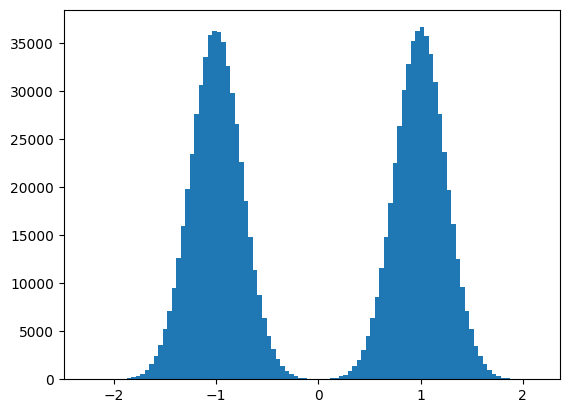

In [32]:
import matplotlib.pyplot as plt
from math import log10

signal_power = np.var(txSignalRaw) # power = variance
print(f"Signal power = {signal_power:.5e}")
noise_power = np.var(np.subtract(rxSignalRaw, txSignalRaw)) # noise power = variance of the difference of receive and transmit
print(f"Noise power = {noise_power:.5e}")

SNR = 10 * log10(signal_power / noise_power)
print(f"SNR = {SNR:.5e} dB")

plt.hist(rxSignalRaw, bins= 100)

total_bits = sum(1 for a in txMsg)
error_bits = sum(1 for a, b in zip(txMsg, rxMsgRawDemod) if a!= b)
BER = error_bits / total_bits
print(f"BER = {BER:.5e}")

## Communication using (simple) Hamming (15,11) code

The setup is similar to the raw communication, with the difference that the data bits first pass through a transducer which adds redudant bits to protect the transmitted data. The channel coding used is the Hamming coding technique which expands blocks of $k=11$ bit to a longer block of $n=15$ bits. This makes it possible to correct $1$ bit error in each block of $15$ bits. 

The sequence of the signals are the following

* txMsg: The binary signal that is transmitted
* txMsgHammEnc: The binary output of the Hamming coding with input "txMsg"
* txSignalHamm: The binary signal "txMsgHammEnc" converted in a PAM-2 format with levels -1 and 1
* rxSignalHamm: The received signal after adding zeros-mean Gaussian noise to "txSignalHamm". It is assumed to that the gain of the channel equals one.
* rxMsgHammDemod: The demodulated binary signal by considering the sign of the received signal "rxSignalHamm"
* rxMsgHamm: The binary signal received after decoding "rxMsgHammDemod" using the Hamming decoder.


In [33]:
SNR_dB = "SimulationData/10"

txMsg = np.loadtxt(str(SNR_dB)+'_txMsg.csv')

txMsgHammEnc = np.loadtxt(str(SNR_dB)+'_txMsgHammEnc.csv')
txSignalHamm = np.loadtxt(str(SNR_dB)+'_txSignalHamm.csv')
rxSignalHamm = np.loadtxt(str(SNR_dB)+'_rxSignalHamm.csv')
rxMsgHammDemod = np.loadtxt(str(SNR_dB)+'_rxMsgHammDemod.csv')
rxMsgHamm = np.loadtxt(str(SNR_dB)+'_rxMsgHamm.csv')


## Assignment communication with Hamming (15,11) coding at a SNR of 10dB

1. Compute the signal and the noise power of the transmitted and received signal.
2. Compute the Signal-to-Noise Ratio (SNR) of the received signal 
3. Determine the BER before and after the Hamming coding/decoding.
4. Determine the code rate $r = k/n$.
5. Check that the coding gain is approximatly 2.5dB at a BER of $10^{-5}$ using the BER versus $E_b/N_0$ curves above.


In [34]:
signal_power = np.var(txSignalHamm) # power = variance
print(f"Signal power = {signal_power:.5e}")
noise_power = np.var(np.subtract(rxSignalHamm, txSignalHamm)) # noise power = variance of the difference of receive and transmit
print(f"Noise power = {noise_power:.5e}")

SNR = 10 * log10(signal_power / noise_power)
print(f"SNR = {SNR:.5e} dB")

total_bits = sum(1 for a in txMsgHammEnc)
error_bits = sum(1 for a, b in zip(txMsgHammEnc, rxMsgHammDemod) if a!= b)
BER_without_hamm = error_bits / total_bits
print(f"BER without Hamm = {BER_without_hamm:.5e}")

total_bits = sum(1 for a in txMsg)
error_bits = sum(1 for a, b in zip(txMsg, rxMsgHamm) if a!= b)
BER_with_hamm = error_bits / total_bits
print(f"BER with Hamm = {BER_with_hamm:.5e}")

k = 11
n = 15
r = k / n
print(f"code rate: r = {r:.5e}")

Signal power = 1.00000e+00
Noise power = 9.97905e-02
SNR = 1.00091e+01 dB
BER without Hamm = 7.79780e-04
BER with Hamm = 3.81470e-06
code rate: r = 7.33333e-01


## Communication using convolutional code

A more preformant channel coding technique is used to protect the data, namely a convolutional code. The encoder is identical for the two considered examples. However, two different decoders are considered, namely a hard and a soft decision decoder. The difference between both decoders is that the hard decision decoder starts at the input by deciding whether the input is a one or a zero and the does the processing. The soft decoder use the probability that a bit is a zero or a one and only decides after the decoding whether this results in a one or a zero. This results in a higher performance / coding gain as the soft decoder uses the (statistical) information more efficiently.

The sequence of the signals are the following

* txMsg: The binary signal that is transmitted
* txMsgConvEnc: The binary output of the convolutional encoder with input "txMsg"
* txSignalConv: The binary signal "txMsgConvEnc" converted in a PAM-2 format with levels -1 and 1
* rxSignalConv: The received signal after adding zeros-mean Gaussian noise to "txSignalConv". It is assumed to that the gain of the channel equals one.
* rxMsgConvDemod: The demodulated binary signal by considering the sign of the received signal "rxSignalConv"

The hard decision decoder 

* rxMsgConvHard: The binary signal received after decoding "rxMsgConvDemod" using the hard decision convolutional decoder.

The soft decision decoder 

* rxMsgConvSoft: The binary signal received after decoding "rxMsgConvDemod" using the hard decision convolutional decoder.


## Assignment communication with convolutional coding at a SNR of 4dB

1. Compute the signal and the noise power of the transmitted and received signal.
2. Compute the Signal-to-Noise Ratio (SNR) of the received signal 
3. Determine the BER 

    * before the convolutions coding
    * after the hard convolutions decoding
    * after the soft convolution decoding
    
4. Determine the code rate $r = k/n$.
5. Compare the coding gain for all channel coding techniques at a BER of $10^{-5}$ using the BER versus $E_b/N_0$ curves above.


In [35]:
SNR_dB = "SimulationData/4"

txMsg = np.loadtxt(str(SNR_dB)+'_txMsg.csv')

txMsgConvEnc = np.loadtxt(str(SNR_dB)+'_txMsgConvEnc.csv')
txSignalConv = np.loadtxt(str(SNR_dB)+'_txSignalConv.csv')
rxSignalConv = np.loadtxt(str(SNR_dB)+'_rxSignalConv.csv')
rxMsgConvDemod = np.loadtxt(str(SNR_dB)+'_rxMsgConvDemod.csv')
rxMsgConvHard = np.loadtxt(str(SNR_dB)+'_rxMsgConvHard.csv')
rxMsgConvSoft = np.loadtxt(str(SNR_dB)+'_rxMsgConvSoft.csv')

In [36]:
signal_power = np.var(txSignalConv) # power = variance
print(f"Signal power = {signal_power:.5e}")
noise_power = np.var(np.subtract(rxSignalConv, txSignalConv)) # noise power = variance of the difference of receive and transmit
print(f"Noise power = {noise_power:.5e}")

SNR = 10 * log10(signal_power / noise_power)
print(f"SNR = {SNR:.5e} dB")

total_bits = sum(1 for a in txMsgConvEnc)
error_bits = sum(1 for a, b in zip(txMsgConvEnc, rxMsgConvDemod) if a!= b)
BER_without_conv = error_bits / total_bits
print(f"BER without conv = {BER_without_conv:.5e}")

total_bits = sum(1 for a in txMsg)
error_bits = sum(1 for a, b in zip(txMsg, rxMsgConvHard) if a!= b)
BER_with_hard = error_bits / total_bits
print(f"BER with Hard = {BER_with_hard:.5e}")

total_bits = sum(1 for a in txMsg)
error_bits = sum(1 for a, b in zip(txMsg, rxMsgConvSoft) if a!= b)
BER_with_soft = error_bits / total_bits
print(f"BER with Soft = {BER_with_soft:.5e}")

k = sum(1 for a in txMsg)
n = sum(1 for a in txMsgConvEnc)
r = k / n
print(f"code rate: r = {r:.5e}")

Signal power = 1.00000e+00
Noise power = 3.98603e-01
SNR = 3.99459e+00 dB
BER without conv = 5.67376e-02
BER with Hard = 6.23131e-03
BER with Soft = 3.14713e-05
code rate: r = 4.99985e-01
